## Stationarity Analysis of Microsoft Stock Closing Price

We will be performing the Augmented Dickey-Fuller (ADF) test on the closing price of Microsoft stocks to check for stationarity.

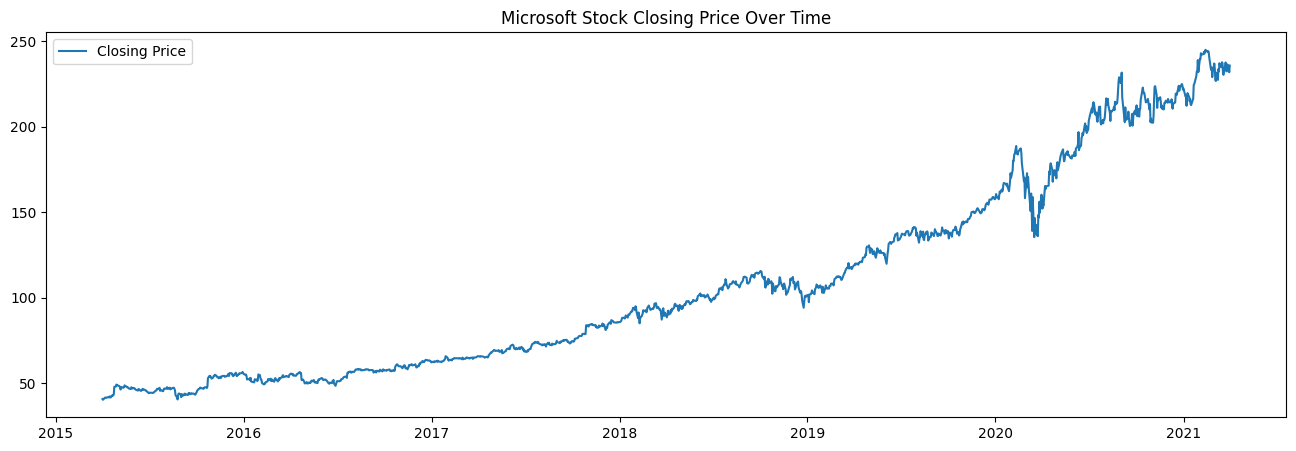

Results of Dickey-Fuller Test:
Test Statistic                    1.737136
p-value                           0.998216
#Lags Used                       24.000000
Number of Observations Used    1486.000000
Critical Value (1%)              -3.434758
Critical Value (5%)              -2.863487
Critical Value (10%)             -2.567807
dtype: float64


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = 'Microsoft_Stock.csv'
stock_data = pd.read_csv(file_path)

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Visualize the closing price over time
plt.figure(figsize=(16,5))
plt.plot(stock_data.index, stock_data['Close'], label="Closing Price")
plt.legend(loc='best')
plt.title("Microsoft Stock Closing Price Over Time")
plt.show()

# Perform the Augmented Dickey-Fuller (ADF) test on the 'Close' column
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Running ADF test on Microsoft stock closing prices
adf_test(stock_data['Close'])


In the context of the given ADF test results:

### Results of Dickey-Fuller Test:
- **Test Statistic**: 1.737136
- **p-value**: 0.998216
- **Critical Values**:
  - 1%: -3.434758
  - 5%: -2.863487
  - 10%: -2.567807

### Interpretation:

1. **Test Statistic vs. Critical Values**:  
   The test statistic (1.737136) is greater than all the critical values (at the 1%, 5%, and 10% significance levels). This indicates that the test statistic is far from being negative enough to reject the null hypothesis.

2. **p-value**:  
   The p-value (0.998216) is much larger than the typical significance threshold (e.g., 0.05). A high p-value means that there is not enough evidence to reject the null hypothesis.

### Conclusion:

- Since the **test statistic** is **greater** than the critical values and the **p-value** is **much larger** than 0.05, you **fail to reject the null hypothesis**. This means that the time series has a unit root and is **non-stationary**.
  
### Relation to Hypothesis:
- The **null hypothesis** (H₀) is that the series is non-stationary (has a unit root).
- The **alternative hypothesis** (H₁) is that the series is stationary (does not have a unit root).
  
Given the test results, we do not have enough evidence to reject the null hypothesis, meaning the series is **non-stationary**. This implies that the series has a time-dependent structure and does not exhibit the properties of a stationary series.